In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import lightgbm as lgb
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import warnings

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [4]:
data_dir = Path('input')
feature_dir = Path('input')
val_dir = Path('input')
tst_dir = Path('input')
sub_dir = Path('input')

trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
sample_file = data_dir / 'sample_submission.csv'

target_col = 'class'
n_fold = 5
n_class = 3
seed = 42

In [5]:
algo_name = 'lgbcv'
feature_name = 'stacking1'
model_name = f'{algo_name}_{feature_name}'

feature_file = feature_dir / f'{feature_name}.csv'
p_val_file = val_dir / f'{model_name}.val.csv'
p_tst_file = tst_dir / f'{model_name}.tst.csv'
sub_file = sub_dir / f'{model_name}.csv'

In [6]:
model_names = ['lrcv_polyfeature', 'rfcv_feature', 'lgbcv_feature']
trn = []
tst = []
feature_names = []
for model in model_names:
    trn.append(np.loadtxt(val_dir / f'{model}.val.csv', delimiter=','))
    tst.append(np.loadtxt(tst_dir / f'{model}.tst.csv', delimiter=','))
    feature_names += [f'{model}_class0', f'{model}_class1', f'{model}_class2']
    
trn = np.hstack(trn)
tst = np.hstack(tst)
feature_names

['lrcv_polyfeature_class0',
 'lrcv_polyfeature_class1',
 'lrcv_polyfeature_class2',
 'rfcv_feature_class0',
 'rfcv_feature_class1',
 'rfcv_feature_class2',
 'lgbcv_feature_class0',
 'lgbcv_feature_class1',
 'lgbcv_feature_class2']

In [7]:
y = pd.read_csv(trn_file, index_col=0, usecols=['id', target_col]).values.flatten()
y.shape

(320000,)

In [8]:
cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [ ]:
p_val = np.zeros((trn.shape[0], n_class))
p_tst = np.zeros((tst.shape[0], n_class))
for i, (i_trn, i_val) in enumerate(cv.split(trn, y), 1):
    print(f'training model for CV #{i}')
    clf = lgb.LGBMClassifier(objective='multiclass',
                             n_estimators=10000,
                             num_leaves=512,
                             learning_rate=0.001,
                             min_child_samples=10,
                             subsample=.7,
                             subsample_freq=1,
                             colsample_bytree=.7,
                             random_state=seed,
                             n_jobs=-1)
    clf.fit(trn[i_trn], y[i_trn],
            eval_set=[(trn[i_val], y[i_val])],
            eval_metric='multiclass',
            early_stopping_rounds=10)
    
    p_val[i_val, :] = clf.predict_proba(trn[i_val])
    p_tst += clf.predict_proba(tst) / n_fold

training model for CV #1
[1]	valid_0's multi_logloss: 0.984806
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 0.983616
[3]	valid_0's multi_logloss: 0.982416
[4]	valid_0's multi_logloss: 0.981219
[5]	valid_0's multi_logloss: 0.980024
[6]	valid_0's multi_logloss: 0.978833
[7]	valid_0's multi_logloss: 0.977646
[8]	valid_0's multi_logloss: 0.97646
[9]	valid_0's multi_logloss: 0.975277
[10]	valid_0's multi_logloss: 0.974097
[11]	valid_0's multi_logloss: 0.972919
[12]	valid_0's multi_logloss: 0.971743
[13]	valid_0's multi_logloss: 0.97057
[14]	valid_0's multi_logloss: 0.9694
[15]	valid_0's multi_logloss: 0.968231
[16]	valid_0's multi_logloss: 0.967067
[17]	valid_0's multi_logloss: 0.965906
[18]	valid_0's multi_logloss: 0.964747
[19]	valid_0's multi_logloss: 0.963589
[20]	valid_0's multi_logloss: 0.962433
[21]	valid_0's multi_logloss: 0.961282
[22]	valid_0's multi_logloss: 0.96013
[23]	valid_0's multi_logloss: 0.958981
[24]	valid_0's multi_logloss: 0

[210]	valid_0's multi_logloss: 0.779823
[211]	valid_0's multi_logloss: 0.77902
[212]	valid_0's multi_logloss: 0.778217
[213]	valid_0's multi_logloss: 0.777416
[214]	valid_0's multi_logloss: 0.776616
[215]	valid_0's multi_logloss: 0.775818
[216]	valid_0's multi_logloss: 0.77502
[217]	valid_0's multi_logloss: 0.774224
[218]	valid_0's multi_logloss: 0.77343
[219]	valid_0's multi_logloss: 0.772637
[220]	valid_0's multi_logloss: 0.771845
[221]	valid_0's multi_logloss: 0.771054
[222]	valid_0's multi_logloss: 0.770264
[223]	valid_0's multi_logloss: 0.769476
[224]	valid_0's multi_logloss: 0.768689
[225]	valid_0's multi_logloss: 0.767904
[226]	valid_0's multi_logloss: 0.76712
[227]	valid_0's multi_logloss: 0.766336
[228]	valid_0's multi_logloss: 0.765555
[229]	valid_0's multi_logloss: 0.764775
[230]	valid_0's multi_logloss: 0.763996
[231]	valid_0's multi_logloss: 0.763219
[232]	valid_0's multi_logloss: 0.762442
[233]	valid_0's multi_logloss: 0.76167
[234]	valid_0's multi_logloss: 0.760896
[235]

[418]	valid_0's multi_logloss: 0.637754
[419]	valid_0's multi_logloss: 0.637175
[420]	valid_0's multi_logloss: 0.636597
[421]	valid_0's multi_logloss: 0.636019
[422]	valid_0's multi_logloss: 0.635442
[423]	valid_0's multi_logloss: 0.634866
[424]	valid_0's multi_logloss: 0.634291
[425]	valid_0's multi_logloss: 0.633717
[426]	valid_0's multi_logloss: 0.633143
[427]	valid_0's multi_logloss: 0.63257
[428]	valid_0's multi_logloss: 0.631999
[429]	valid_0's multi_logloss: 0.631428
[430]	valid_0's multi_logloss: 0.630859
[431]	valid_0's multi_logloss: 0.63029
[432]	valid_0's multi_logloss: 0.629721
[433]	valid_0's multi_logloss: 0.629153
[434]	valid_0's multi_logloss: 0.628587
[435]	valid_0's multi_logloss: 0.628021
[436]	valid_0's multi_logloss: 0.627456
[437]	valid_0's multi_logloss: 0.626892
[438]	valid_0's multi_logloss: 0.626329
[439]	valid_0's multi_logloss: 0.625766
[440]	valid_0's multi_logloss: 0.625209
[441]	valid_0's multi_logloss: 0.624647
[442]	valid_0's multi_logloss: 0.624087
[4

[625]	valid_0's multi_logloss: 0.533938
[626]	valid_0's multi_logloss: 0.533506
[627]	valid_0's multi_logloss: 0.533076
[628]	valid_0's multi_logloss: 0.532644
[629]	valid_0's multi_logloss: 0.532214
[630]	valid_0's multi_logloss: 0.531784
[631]	valid_0's multi_logloss: 0.531354
[632]	valid_0's multi_logloss: 0.530924
[633]	valid_0's multi_logloss: 0.530496
[634]	valid_0's multi_logloss: 0.530068
[635]	valid_0's multi_logloss: 0.52964
[636]	valid_0's multi_logloss: 0.529213
[637]	valid_0's multi_logloss: 0.528786
[638]	valid_0's multi_logloss: 0.52836
[639]	valid_0's multi_logloss: 0.527935
[640]	valid_0's multi_logloss: 0.52751
[641]	valid_0's multi_logloss: 0.527087
[642]	valid_0's multi_logloss: 0.526663
[643]	valid_0's multi_logloss: 0.52624
[644]	valid_0's multi_logloss: 0.525817
[645]	valid_0's multi_logloss: 0.525394
[646]	valid_0's multi_logloss: 0.524972
[647]	valid_0's multi_logloss: 0.524551
[648]	valid_0's multi_logloss: 0.524133
[649]	valid_0's multi_logloss: 0.523713
[650

[832]	valid_0's multi_logloss: 0.455505
[833]	valid_0's multi_logloss: 0.455175
[834]	valid_0's multi_logloss: 0.454846
[835]	valid_0's multi_logloss: 0.454516
[836]	valid_0's multi_logloss: 0.454188
[837]	valid_0's multi_logloss: 0.453859
[838]	valid_0's multi_logloss: 0.45353
[839]	valid_0's multi_logloss: 0.453202
[840]	valid_0's multi_logloss: 0.452875
[841]	valid_0's multi_logloss: 0.452547
[842]	valid_0's multi_logloss: 0.452221
[843]	valid_0's multi_logloss: 0.451895
[844]	valid_0's multi_logloss: 0.451568
[845]	valid_0's multi_logloss: 0.451243
[846]	valid_0's multi_logloss: 0.450918
[847]	valid_0's multi_logloss: 0.450595
[848]	valid_0's multi_logloss: 0.45027
[849]	valid_0's multi_logloss: 0.449946
[850]	valid_0's multi_logloss: 0.449622
[851]	valid_0's multi_logloss: 0.4493
[852]	valid_0's multi_logloss: 0.448977
[853]	valid_0's multi_logloss: 0.448656
[854]	valid_0's multi_logloss: 0.448334
[855]	valid_0's multi_logloss: 0.448012
[856]	valid_0's multi_logloss: 0.447692
[857

[1040]	valid_0's multi_logloss: 0.394926
[1041]	valid_0's multi_logloss: 0.394671
[1042]	valid_0's multi_logloss: 0.394415
[1043]	valid_0's multi_logloss: 0.39416
[1044]	valid_0's multi_logloss: 0.393905
[1045]	valid_0's multi_logloss: 0.393651
[1046]	valid_0's multi_logloss: 0.393397
[1047]	valid_0's multi_logloss: 0.393143
[1048]	valid_0's multi_logloss: 0.39289
[1049]	valid_0's multi_logloss: 0.392637
[1050]	valid_0's multi_logloss: 0.392384
[1051]	valid_0's multi_logloss: 0.392131
[1052]	valid_0's multi_logloss: 0.391879
[1053]	valid_0's multi_logloss: 0.391627
[1054]	valid_0's multi_logloss: 0.391377
[1055]	valid_0's multi_logloss: 0.391125
[1056]	valid_0's multi_logloss: 0.390874
[1057]	valid_0's multi_logloss: 0.390624
[1058]	valid_0's multi_logloss: 0.390373
[1059]	valid_0's multi_logloss: 0.390123
[1060]	valid_0's multi_logloss: 0.389874
[1061]	valid_0's multi_logloss: 0.389624
[1062]	valid_0's multi_logloss: 0.389374
[1063]	valid_0's multi_logloss: 0.389125
[1064]	valid_0's m

[1244]	valid_0's multi_logloss: 0.348609
[1245]	valid_0's multi_logloss: 0.348408
[1246]	valid_0's multi_logloss: 0.348209
[1247]	valid_0's multi_logloss: 0.348009
[1248]	valid_0's multi_logloss: 0.347809
[1249]	valid_0's multi_logloss: 0.347609
[1250]	valid_0's multi_logloss: 0.347409
[1251]	valid_0's multi_logloss: 0.34721
[1252]	valid_0's multi_logloss: 0.34701
[1253]	valid_0's multi_logloss: 0.346811
[1254]	valid_0's multi_logloss: 0.346612
[1255]	valid_0's multi_logloss: 0.346414
[1256]	valid_0's multi_logloss: 0.346217
[1257]	valid_0's multi_logloss: 0.346019
[1258]	valid_0's multi_logloss: 0.345822
[1259]	valid_0's multi_logloss: 0.345624
[1260]	valid_0's multi_logloss: 0.345426
[1261]	valid_0's multi_logloss: 0.34523
[1262]	valid_0's multi_logloss: 0.345033
[1263]	valid_0's multi_logloss: 0.344838
[1264]	valid_0's multi_logloss: 0.344641
[1265]	valid_0's multi_logloss: 0.344444
[1266]	valid_0's multi_logloss: 0.344248
[1267]	valid_0's multi_logloss: 0.344053
[1268]	valid_0's mu

[1447]	valid_0's multi_logloss: 0.312237
[1448]	valid_0's multi_logloss: 0.312078
[1449]	valid_0's multi_logloss: 0.311919
[1450]	valid_0's multi_logloss: 0.311761
[1451]	valid_0's multi_logloss: 0.311602
[1452]	valid_0's multi_logloss: 0.311444
[1453]	valid_0's multi_logloss: 0.311286
[1454]	valid_0's multi_logloss: 0.311128
[1455]	valid_0's multi_logloss: 0.31097
[1456]	valid_0's multi_logloss: 0.310813
[1457]	valid_0's multi_logloss: 0.310655
[1458]	valid_0's multi_logloss: 0.310498
[1459]	valid_0's multi_logloss: 0.310341
[1460]	valid_0's multi_logloss: 0.310184
[1461]	valid_0's multi_logloss: 0.310026
[1462]	valid_0's multi_logloss: 0.30987
[1463]	valid_0's multi_logloss: 0.309713
[1464]	valid_0's multi_logloss: 0.309558
[1465]	valid_0's multi_logloss: 0.309402
[1466]	valid_0's multi_logloss: 0.309246
[1467]	valid_0's multi_logloss: 0.309091
[1468]	valid_0's multi_logloss: 0.308936
[1469]	valid_0's multi_logloss: 0.30878
[1470]	valid_0's multi_logloss: 0.308626
[1471]	valid_0's mu

[1650]	valid_0's multi_logloss: 0.283339
[1651]	valid_0's multi_logloss: 0.283213
[1652]	valid_0's multi_logloss: 0.283087
[1653]	valid_0's multi_logloss: 0.28296
[1654]	valid_0's multi_logloss: 0.282834
[1655]	valid_0's multi_logloss: 0.282708
[1656]	valid_0's multi_logloss: 0.282581
[1657]	valid_0's multi_logloss: 0.282455
[1658]	valid_0's multi_logloss: 0.282329
[1659]	valid_0's multi_logloss: 0.282203
[1660]	valid_0's multi_logloss: 0.282078
[1661]	valid_0's multi_logloss: 0.281952
[1662]	valid_0's multi_logloss: 0.281826
[1663]	valid_0's multi_logloss: 0.281701
[1664]	valid_0's multi_logloss: 0.281576
[1665]	valid_0's multi_logloss: 0.281451
[1666]	valid_0's multi_logloss: 0.281327
[1667]	valid_0's multi_logloss: 0.281203
[1668]	valid_0's multi_logloss: 0.281078
[1669]	valid_0's multi_logloss: 0.280954
[1670]	valid_0's multi_logloss: 0.28083
[1671]	valid_0's multi_logloss: 0.280706
[1672]	valid_0's multi_logloss: 0.280582
[1673]	valid_0's multi_logloss: 0.280459
[1674]	valid_0's m

[1853]	valid_0's multi_logloss: 0.260227
[1854]	valid_0's multi_logloss: 0.260126
[1855]	valid_0's multi_logloss: 0.260024
[1856]	valid_0's multi_logloss: 0.259923
[1857]	valid_0's multi_logloss: 0.259823
[1858]	valid_0's multi_logloss: 0.259722
[1859]	valid_0's multi_logloss: 0.259621
[1860]	valid_0's multi_logloss: 0.25952
[1861]	valid_0's multi_logloss: 0.259419
[1862]	valid_0's multi_logloss: 0.259318
[1863]	valid_0's multi_logloss: 0.259218
[1864]	valid_0's multi_logloss: 0.259117
[1865]	valid_0's multi_logloss: 0.259017
[1866]	valid_0's multi_logloss: 0.258916
[1867]	valid_0's multi_logloss: 0.258815
[1868]	valid_0's multi_logloss: 0.258715
[1869]	valid_0's multi_logloss: 0.258614
[1870]	valid_0's multi_logloss: 0.258515
[1871]	valid_0's multi_logloss: 0.258415
[1872]	valid_0's multi_logloss: 0.258316
[1873]	valid_0's multi_logloss: 0.258216
[1874]	valid_0's multi_logloss: 0.258117
[1875]	valid_0's multi_logloss: 0.258017
[1876]	valid_0's multi_logloss: 0.257918
[1877]	valid_0's 

[2054]	valid_0's multi_logloss: 0.24183
[2055]	valid_0's multi_logloss: 0.241748
[2056]	valid_0's multi_logloss: 0.241666
[2057]	valid_0's multi_logloss: 0.241584
[2058]	valid_0's multi_logloss: 0.241502
[2059]	valid_0's multi_logloss: 0.24142
[2060]	valid_0's multi_logloss: 0.241338
[2061]	valid_0's multi_logloss: 0.241257
[2062]	valid_0's multi_logloss: 0.241175
[2063]	valid_0's multi_logloss: 0.241093
[2064]	valid_0's multi_logloss: 0.241012
[2065]	valid_0's multi_logloss: 0.240931
[2066]	valid_0's multi_logloss: 0.24085
[2067]	valid_0's multi_logloss: 0.240769
[2068]	valid_0's multi_logloss: 0.240688
[2069]	valid_0's multi_logloss: 0.240608
[2070]	valid_0's multi_logloss: 0.240527
[2071]	valid_0's multi_logloss: 0.240447
[2072]	valid_0's multi_logloss: 0.240366
[2073]	valid_0's multi_logloss: 0.240286
[2074]	valid_0's multi_logloss: 0.240205
[2075]	valid_0's multi_logloss: 0.240124
[2076]	valid_0's multi_logloss: 0.240044
[2077]	valid_0's multi_logloss: 0.239963
[2078]	valid_0's mu

[2256]	valid_0's multi_logloss: 0.226906
[2257]	valid_0's multi_logloss: 0.22684
[2258]	valid_0's multi_logloss: 0.226774
[2259]	valid_0's multi_logloss: 0.226707
[2260]	valid_0's multi_logloss: 0.226641
[2261]	valid_0's multi_logloss: 0.226575
[2262]	valid_0's multi_logloss: 0.226508
[2263]	valid_0's multi_logloss: 0.226442
[2264]	valid_0's multi_logloss: 0.226377
[2265]	valid_0's multi_logloss: 0.226311
[2266]	valid_0's multi_logloss: 0.226245
[2267]	valid_0's multi_logloss: 0.22618
[2268]	valid_0's multi_logloss: 0.226114
[2269]	valid_0's multi_logloss: 0.226049
[2270]	valid_0's multi_logloss: 0.225984
[2271]	valid_0's multi_logloss: 0.225918
[2272]	valid_0's multi_logloss: 0.225852
[2273]	valid_0's multi_logloss: 0.225787
[2274]	valid_0's multi_logloss: 0.225722
[2275]	valid_0's multi_logloss: 0.225656
[2276]	valid_0's multi_logloss: 0.22559
[2277]	valid_0's multi_logloss: 0.225525
[2278]	valid_0's multi_logloss: 0.225461
[2279]	valid_0's multi_logloss: 0.225396
[2280]	valid_0's mu

[2458]	valid_0's multi_logloss: 0.214821
[2459]	valid_0's multi_logloss: 0.214767
[2460]	valid_0's multi_logloss: 0.214714
[2461]	valid_0's multi_logloss: 0.21466
[2462]	valid_0's multi_logloss: 0.214606
[2463]	valid_0's multi_logloss: 0.214552
[2464]	valid_0's multi_logloss: 0.214498
[2465]	valid_0's multi_logloss: 0.214444
[2466]	valid_0's multi_logloss: 0.214391
[2467]	valid_0's multi_logloss: 0.214337
[2468]	valid_0's multi_logloss: 0.214284
[2469]	valid_0's multi_logloss: 0.21423
[2470]	valid_0's multi_logloss: 0.214176
[2471]	valid_0's multi_logloss: 0.214123
[2472]	valid_0's multi_logloss: 0.21407
[2473]	valid_0's multi_logloss: 0.214016
[2474]	valid_0's multi_logloss: 0.213963
[2475]	valid_0's multi_logloss: 0.213911
[2476]	valid_0's multi_logloss: 0.213858
[2477]	valid_0's multi_logloss: 0.213805
[2478]	valid_0's multi_logloss: 0.213752
[2479]	valid_0's multi_logloss: 0.213699
[2480]	valid_0's multi_logloss: 0.213646
[2481]	valid_0's multi_logloss: 0.213594
[2482]	valid_0's mu

[2662]	valid_0's multi_logloss: 0.204901
[2663]	valid_0's multi_logloss: 0.204858
[2664]	valid_0's multi_logloss: 0.204814
[2665]	valid_0's multi_logloss: 0.204771
[2666]	valid_0's multi_logloss: 0.204727
[2667]	valid_0's multi_logloss: 0.204683
[2668]	valid_0's multi_logloss: 0.204639
[2669]	valid_0's multi_logloss: 0.204596
[2670]	valid_0's multi_logloss: 0.204552
[2671]	valid_0's multi_logloss: 0.204509
[2672]	valid_0's multi_logloss: 0.204466
[2673]	valid_0's multi_logloss: 0.204423
[2674]	valid_0's multi_logloss: 0.20438
[2675]	valid_0's multi_logloss: 0.204337
[2676]	valid_0's multi_logloss: 0.204293
[2677]	valid_0's multi_logloss: 0.20425
[2678]	valid_0's multi_logloss: 0.204208
[2679]	valid_0's multi_logloss: 0.204164
[2680]	valid_0's multi_logloss: 0.204121
[2681]	valid_0's multi_logloss: 0.204078
[2682]	valid_0's multi_logloss: 0.204036
[2683]	valid_0's multi_logloss: 0.203993
[2684]	valid_0's multi_logloss: 0.20395
[2685]	valid_0's multi_logloss: 0.203908
[2686]	valid_0's mu

[2866]	valid_0's multi_logloss: 0.196826
[2867]	valid_0's multi_logloss: 0.19679
[2868]	valid_0's multi_logloss: 0.196755
[2869]	valid_0's multi_logloss: 0.196719
[2870]	valid_0's multi_logloss: 0.196683
[2871]	valid_0's multi_logloss: 0.196648
[2872]	valid_0's multi_logloss: 0.196613
[2873]	valid_0's multi_logloss: 0.196577
[2874]	valid_0's multi_logloss: 0.196542
[2875]	valid_0's multi_logloss: 0.196507
[2876]	valid_0's multi_logloss: 0.196472
[2877]	valid_0's multi_logloss: 0.196437
[2878]	valid_0's multi_logloss: 0.196402
[2879]	valid_0's multi_logloss: 0.196367
[2880]	valid_0's multi_logloss: 0.196332
[2881]	valid_0's multi_logloss: 0.196297
[2882]	valid_0's multi_logloss: 0.196262
[2883]	valid_0's multi_logloss: 0.196226
[2884]	valid_0's multi_logloss: 0.196191
[2885]	valid_0's multi_logloss: 0.196157
[2886]	valid_0's multi_logloss: 0.196121
[2887]	valid_0's multi_logloss: 0.196086
[2888]	valid_0's multi_logloss: 0.196051
[2889]	valid_0's multi_logloss: 0.196016
[2890]	valid_0's 

[3069]	valid_0's multi_logloss: 0.19026
[3070]	valid_0's multi_logloss: 0.190231
[3071]	valid_0's multi_logloss: 0.190202
[3072]	valid_0's multi_logloss: 0.190172
[3073]	valid_0's multi_logloss: 0.190143
[3074]	valid_0's multi_logloss: 0.190114
[3075]	valid_0's multi_logloss: 0.190085
[3076]	valid_0's multi_logloss: 0.190056
[3077]	valid_0's multi_logloss: 0.190027
[3078]	valid_0's multi_logloss: 0.189998
[3079]	valid_0's multi_logloss: 0.189969
[3080]	valid_0's multi_logloss: 0.189941
[3081]	valid_0's multi_logloss: 0.189911
[3082]	valid_0's multi_logloss: 0.189882
[3083]	valid_0's multi_logloss: 0.189854
[3084]	valid_0's multi_logloss: 0.189825
[3085]	valid_0's multi_logloss: 0.189796
[3086]	valid_0's multi_logloss: 0.189768
[3087]	valid_0's multi_logloss: 0.189739
[3088]	valid_0's multi_logloss: 0.189711
[3089]	valid_0's multi_logloss: 0.189682
[3090]	valid_0's multi_logloss: 0.189653
[3091]	valid_0's multi_logloss: 0.189624
[3092]	valid_0's multi_logloss: 0.189595
[3093]	valid_0's 

[3272]	valid_0's multi_logloss: 0.184876
[3273]	valid_0's multi_logloss: 0.184852
[3274]	valid_0's multi_logloss: 0.184828
[3275]	valid_0's multi_logloss: 0.184804
[3276]	valid_0's multi_logloss: 0.184781
[3277]	valid_0's multi_logloss: 0.184757
[3278]	valid_0's multi_logloss: 0.184733
[3279]	valid_0's multi_logloss: 0.18471
[3280]	valid_0's multi_logloss: 0.184686
[3281]	valid_0's multi_logloss: 0.184662
[3282]	valid_0's multi_logloss: 0.184638
[3283]	valid_0's multi_logloss: 0.184615
[3284]	valid_0's multi_logloss: 0.184591
[3285]	valid_0's multi_logloss: 0.184568
[3286]	valid_0's multi_logloss: 0.184544
[3287]	valid_0's multi_logloss: 0.18452
[3288]	valid_0's multi_logloss: 0.184497
[3289]	valid_0's multi_logloss: 0.184473
[3290]	valid_0's multi_logloss: 0.184449
[3291]	valid_0's multi_logloss: 0.184425
[3292]	valid_0's multi_logloss: 0.184402
[3293]	valid_0's multi_logloss: 0.184378
[3294]	valid_0's multi_logloss: 0.184354
[3295]	valid_0's multi_logloss: 0.18433
[3296]	valid_0's mu

[3476]	valid_0's multi_logloss: 0.180426
[3477]	valid_0's multi_logloss: 0.180406
[3478]	valid_0's multi_logloss: 0.180386
[3479]	valid_0's multi_logloss: 0.180366
[3480]	valid_0's multi_logloss: 0.180347
[3481]	valid_0's multi_logloss: 0.180327
[3482]	valid_0's multi_logloss: 0.180307
[3483]	valid_0's multi_logloss: 0.180287
[3484]	valid_0's multi_logloss: 0.180267
[3485]	valid_0's multi_logloss: 0.180248
[3486]	valid_0's multi_logloss: 0.180229
[3487]	valid_0's multi_logloss: 0.180209
[3488]	valid_0's multi_logloss: 0.180189
[3489]	valid_0's multi_logloss: 0.18017
[3490]	valid_0's multi_logloss: 0.18015
[3491]	valid_0's multi_logloss: 0.18013
[3492]	valid_0's multi_logloss: 0.18011
[3493]	valid_0's multi_logloss: 0.180091
[3494]	valid_0's multi_logloss: 0.180072
[3495]	valid_0's multi_logloss: 0.180053
[3496]	valid_0's multi_logloss: 0.180034
[3497]	valid_0's multi_logloss: 0.180014
[3498]	valid_0's multi_logloss: 0.179995
[3499]	valid_0's multi_logloss: 0.179975
[3500]	valid_0's mul

[3678]	valid_0's multi_logloss: 0.176802
[3679]	valid_0's multi_logloss: 0.176786
[3680]	valid_0's multi_logloss: 0.17677
[3681]	valid_0's multi_logloss: 0.176755
[3682]	valid_0's multi_logloss: 0.176738
[3683]	valid_0's multi_logloss: 0.176722
[3684]	valid_0's multi_logloss: 0.176706
[3685]	valid_0's multi_logloss: 0.17669
[3686]	valid_0's multi_logloss: 0.176674
[3687]	valid_0's multi_logloss: 0.176657
[3688]	valid_0's multi_logloss: 0.176641
[3689]	valid_0's multi_logloss: 0.176625
[3690]	valid_0's multi_logloss: 0.176609
[3691]	valid_0's multi_logloss: 0.176593
[3692]	valid_0's multi_logloss: 0.176577
[3693]	valid_0's multi_logloss: 0.176561
[3694]	valid_0's multi_logloss: 0.176546
[3695]	valid_0's multi_logloss: 0.17653
[3696]	valid_0's multi_logloss: 0.176514
[3697]	valid_0's multi_logloss: 0.176498
[3698]	valid_0's multi_logloss: 0.176481
[3699]	valid_0's multi_logloss: 0.176465
[3700]	valid_0's multi_logloss: 0.176449
[3701]	valid_0's multi_logloss: 0.176434
[3702]	valid_0's mu

[3881]	valid_0's multi_logloss: 0.173792
[3882]	valid_0's multi_logloss: 0.173778
[3883]	valid_0's multi_logloss: 0.173765
[3884]	valid_0's multi_logloss: 0.173751
[3885]	valid_0's multi_logloss: 0.173739
[3886]	valid_0's multi_logloss: 0.173725
[3887]	valid_0's multi_logloss: 0.173711
[3888]	valid_0's multi_logloss: 0.173698
[3889]	valid_0's multi_logloss: 0.173684
[3890]	valid_0's multi_logloss: 0.17367
[3891]	valid_0's multi_logloss: 0.173657
[3892]	valid_0's multi_logloss: 0.173643
[3893]	valid_0's multi_logloss: 0.17363
[3894]	valid_0's multi_logloss: 0.173617
[3895]	valid_0's multi_logloss: 0.173604
[3896]	valid_0's multi_logloss: 0.17359
[3897]	valid_0's multi_logloss: 0.173577
[3898]	valid_0's multi_logloss: 0.173563
[3899]	valid_0's multi_logloss: 0.17355
[3900]	valid_0's multi_logloss: 0.173537
[3901]	valid_0's multi_logloss: 0.173524
[3902]	valid_0's multi_logloss: 0.173511
[3903]	valid_0's multi_logloss: 0.173497
[3904]	valid_0's multi_logloss: 0.173484
[3905]	valid_0's mul

[4085]	valid_0's multi_logloss: 0.171293
[4086]	valid_0's multi_logloss: 0.171282
[4087]	valid_0's multi_logloss: 0.17127
[4088]	valid_0's multi_logloss: 0.171258
[4089]	valid_0's multi_logloss: 0.171247
[4090]	valid_0's multi_logloss: 0.171235
[4091]	valid_0's multi_logloss: 0.171224
[4092]	valid_0's multi_logloss: 0.171213
[4093]	valid_0's multi_logloss: 0.171202
[4094]	valid_0's multi_logloss: 0.171192
[4095]	valid_0's multi_logloss: 0.171181
[4096]	valid_0's multi_logloss: 0.17117
[4097]	valid_0's multi_logloss: 0.171159
[4098]	valid_0's multi_logloss: 0.171149
[4099]	valid_0's multi_logloss: 0.171137
[4100]	valid_0's multi_logloss: 0.171127
[4101]	valid_0's multi_logloss: 0.171116
[4102]	valid_0's multi_logloss: 0.171105
[4103]	valid_0's multi_logloss: 0.171094
[4104]	valid_0's multi_logloss: 0.171083
[4105]	valid_0's multi_logloss: 0.171072
[4106]	valid_0's multi_logloss: 0.171061
[4107]	valid_0's multi_logloss: 0.17105
[4108]	valid_0's multi_logloss: 0.171038
[4109]	valid_0's mu

[4286]	valid_0's multi_logloss: 0.169239
[4287]	valid_0's multi_logloss: 0.169229
[4288]	valid_0's multi_logloss: 0.169219
[4289]	valid_0's multi_logloss: 0.16921
[4290]	valid_0's multi_logloss: 0.169201
[4291]	valid_0's multi_logloss: 0.169192
[4292]	valid_0's multi_logloss: 0.169182
[4293]	valid_0's multi_logloss: 0.169173
[4294]	valid_0's multi_logloss: 0.169163
[4295]	valid_0's multi_logloss: 0.169154
[4296]	valid_0's multi_logloss: 0.169145
[4297]	valid_0's multi_logloss: 0.169135
[4298]	valid_0's multi_logloss: 0.169126
[4299]	valid_0's multi_logloss: 0.169117
[4300]	valid_0's multi_logloss: 0.169108
[4301]	valid_0's multi_logloss: 0.169098
[4302]	valid_0's multi_logloss: 0.169089
[4303]	valid_0's multi_logloss: 0.16908
[4304]	valid_0's multi_logloss: 0.16907
[4305]	valid_0's multi_logloss: 0.169061
[4306]	valid_0's multi_logloss: 0.169052
[4307]	valid_0's multi_logloss: 0.169043
[4308]	valid_0's multi_logloss: 0.169034
[4309]	valid_0's multi_logloss: 0.169024
[4310]	valid_0's mu

[4487]	valid_0's multi_logloss: 0.167527
[4488]	valid_0's multi_logloss: 0.167519
[4489]	valid_0's multi_logloss: 0.167512
[4490]	valid_0's multi_logloss: 0.167504
[4491]	valid_0's multi_logloss: 0.167496
[4492]	valid_0's multi_logloss: 0.167488
[4493]	valid_0's multi_logloss: 0.16748
[4494]	valid_0's multi_logloss: 0.167472
[4495]	valid_0's multi_logloss: 0.167465
[4496]	valid_0's multi_logloss: 0.167457
[4497]	valid_0's multi_logloss: 0.167449
[4498]	valid_0's multi_logloss: 0.167442
[4499]	valid_0's multi_logloss: 0.167434
[4500]	valid_0's multi_logloss: 0.167427
[4501]	valid_0's multi_logloss: 0.16742
[4502]	valid_0's multi_logloss: 0.167413
[4503]	valid_0's multi_logloss: 0.167405
[4504]	valid_0's multi_logloss: 0.167398
[4505]	valid_0's multi_logloss: 0.16739
[4506]	valid_0's multi_logloss: 0.167383
[4507]	valid_0's multi_logloss: 0.167375
[4508]	valid_0's multi_logloss: 0.167368
[4509]	valid_0's multi_logloss: 0.16736
[4510]	valid_0's multi_logloss: 0.167352
[4511]	valid_0's mul

[4690]	valid_0's multi_logloss: 0.166088
[4691]	valid_0's multi_logloss: 0.166081
[4692]	valid_0's multi_logloss: 0.166075
[4693]	valid_0's multi_logloss: 0.166069
[4694]	valid_0's multi_logloss: 0.166062
[4695]	valid_0's multi_logloss: 0.166055
[4696]	valid_0's multi_logloss: 0.166048
[4697]	valid_0's multi_logloss: 0.166041
[4698]	valid_0's multi_logloss: 0.166036
[4699]	valid_0's multi_logloss: 0.16603
[4700]	valid_0's multi_logloss: 0.166024
[4701]	valid_0's multi_logloss: 0.166018
[4702]	valid_0's multi_logloss: 0.166011
[4703]	valid_0's multi_logloss: 0.166005
[4704]	valid_0's multi_logloss: 0.165998
[4705]	valid_0's multi_logloss: 0.165992
[4706]	valid_0's multi_logloss: 0.165986
[4707]	valid_0's multi_logloss: 0.165979
[4708]	valid_0's multi_logloss: 0.165973
[4709]	valid_0's multi_logloss: 0.165966
[4710]	valid_0's multi_logloss: 0.16596
[4711]	valid_0's multi_logloss: 0.165953
[4712]	valid_0's multi_logloss: 0.165947
[4713]	valid_0's multi_logloss: 0.165941
[4714]	valid_0's m

[4893]	valid_0's multi_logloss: 0.16489
[4894]	valid_0's multi_logloss: 0.164885
[4895]	valid_0's multi_logloss: 0.164879
[4896]	valid_0's multi_logloss: 0.164874
[4897]	valid_0's multi_logloss: 0.164869
[4898]	valid_0's multi_logloss: 0.164863
[4899]	valid_0's multi_logloss: 0.164858
[4900]	valid_0's multi_logloss: 0.164853
[4901]	valid_0's multi_logloss: 0.164848
[4902]	valid_0's multi_logloss: 0.164842
[4903]	valid_0's multi_logloss: 0.164837
[4904]	valid_0's multi_logloss: 0.164832
[4905]	valid_0's multi_logloss: 0.164827
[4906]	valid_0's multi_logloss: 0.164822
[4907]	valid_0's multi_logloss: 0.164817
[4908]	valid_0's multi_logloss: 0.164811
[4909]	valid_0's multi_logloss: 0.164806
[4910]	valid_0's multi_logloss: 0.1648
[4911]	valid_0's multi_logloss: 0.164795
[4912]	valid_0's multi_logloss: 0.164789
[4913]	valid_0's multi_logloss: 0.164784
[4914]	valid_0's multi_logloss: 0.164779
[4915]	valid_0's multi_logloss: 0.164773
[4916]	valid_0's multi_logloss: 0.164768
[4917]	valid_0's mu

[5094]	valid_0's multi_logloss: 0.1639
[5095]	valid_0's multi_logloss: 0.163895
[5096]	valid_0's multi_logloss: 0.163891
[5097]	valid_0's multi_logloss: 0.163886
[5098]	valid_0's multi_logloss: 0.163882
[5099]	valid_0's multi_logloss: 0.163877
[5100]	valid_0's multi_logloss: 0.163872
[5101]	valid_0's multi_logloss: 0.163868
[5102]	valid_0's multi_logloss: 0.163863
[5103]	valid_0's multi_logloss: 0.163858
[5104]	valid_0's multi_logloss: 0.163854
[5105]	valid_0's multi_logloss: 0.163849
[5106]	valid_0's multi_logloss: 0.163844
[5107]	valid_0's multi_logloss: 0.16384
[5108]	valid_0's multi_logloss: 0.163836
[5109]	valid_0's multi_logloss: 0.163831
[5110]	valid_0's multi_logloss: 0.163826
[5111]	valid_0's multi_logloss: 0.163822
[5112]	valid_0's multi_logloss: 0.163817
[5113]	valid_0's multi_logloss: 0.163812
[5114]	valid_0's multi_logloss: 0.163808
[5115]	valid_0's multi_logloss: 0.163804
[5116]	valid_0's multi_logloss: 0.163799
[5117]	valid_0's multi_logloss: 0.163795
[5118]	valid_0's mu

[5295]	valid_0's multi_logloss: 0.163069
[5296]	valid_0's multi_logloss: 0.163065
[5297]	valid_0's multi_logloss: 0.163061
[5298]	valid_0's multi_logloss: 0.163057
[5299]	valid_0's multi_logloss: 0.163053
[5300]	valid_0's multi_logloss: 0.163049
[5301]	valid_0's multi_logloss: 0.163046
[5302]	valid_0's multi_logloss: 0.163041
[5303]	valid_0's multi_logloss: 0.163038
[5304]	valid_0's multi_logloss: 0.163034
[5305]	valid_0's multi_logloss: 0.16303
[5306]	valid_0's multi_logloss: 0.163027
[5307]	valid_0's multi_logloss: 0.163023
[5308]	valid_0's multi_logloss: 0.163018
[5309]	valid_0's multi_logloss: 0.163015
[5310]	valid_0's multi_logloss: 0.163011
[5311]	valid_0's multi_logloss: 0.163007
[5312]	valid_0's multi_logloss: 0.163004
[5313]	valid_0's multi_logloss: 0.163
[5314]	valid_0's multi_logloss: 0.162996
[5315]	valid_0's multi_logloss: 0.162992
[5316]	valid_0's multi_logloss: 0.162989
[5317]	valid_0's multi_logloss: 0.162985
[5318]	valid_0's multi_logloss: 0.162981
[5319]	valid_0's mul

[5499]	valid_0's multi_logloss: 0.162369
[5500]	valid_0's multi_logloss: 0.162366
[5501]	valid_0's multi_logloss: 0.162363
[5502]	valid_0's multi_logloss: 0.162359
[5503]	valid_0's multi_logloss: 0.162356
[5504]	valid_0's multi_logloss: 0.162353
[5505]	valid_0's multi_logloss: 0.16235
[5506]	valid_0's multi_logloss: 0.162347
[5507]	valid_0's multi_logloss: 0.162344
[5508]	valid_0's multi_logloss: 0.162341
[5509]	valid_0's multi_logloss: 0.162338
[5510]	valid_0's multi_logloss: 0.162335
[5511]	valid_0's multi_logloss: 0.162332
[5512]	valid_0's multi_logloss: 0.162329
[5513]	valid_0's multi_logloss: 0.162326
[5514]	valid_0's multi_logloss: 0.162322
[5515]	valid_0's multi_logloss: 0.162319
[5516]	valid_0's multi_logloss: 0.162315
[5517]	valid_0's multi_logloss: 0.162312
[5518]	valid_0's multi_logloss: 0.162309
[5519]	valid_0's multi_logloss: 0.162306
[5520]	valid_0's multi_logloss: 0.162303
[5521]	valid_0's multi_logloss: 0.1623
[5522]	valid_0's multi_logloss: 0.162297
[5523]	valid_0's mu

[5703]	valid_0's multi_logloss: 0.161783
[5704]	valid_0's multi_logloss: 0.161781
[5705]	valid_0's multi_logloss: 0.161778
[5706]	valid_0's multi_logloss: 0.161776
[5707]	valid_0's multi_logloss: 0.161773
[5708]	valid_0's multi_logloss: 0.16177
[5709]	valid_0's multi_logloss: 0.161768
[5710]	valid_0's multi_logloss: 0.161765
[5711]	valid_0's multi_logloss: 0.161763
[5712]	valid_0's multi_logloss: 0.161761
[5713]	valid_0's multi_logloss: 0.161758
[5714]	valid_0's multi_logloss: 0.161755
[5715]	valid_0's multi_logloss: 0.161753
[5716]	valid_0's multi_logloss: 0.16175
[5717]	valid_0's multi_logloss: 0.161747
[5718]	valid_0's multi_logloss: 0.161745
[5719]	valid_0's multi_logloss: 0.161742
[5720]	valid_0's multi_logloss: 0.16174
[5721]	valid_0's multi_logloss: 0.161737
[5722]	valid_0's multi_logloss: 0.161735
[5723]	valid_0's multi_logloss: 0.161732
[5724]	valid_0's multi_logloss: 0.16173
[5725]	valid_0's multi_logloss: 0.161728
[5726]	valid_0's multi_logloss: 0.161725
[5727]	valid_0's mul

[5905]	valid_0's multi_logloss: 0.161302
[5906]	valid_0's multi_logloss: 0.1613
[5907]	valid_0's multi_logloss: 0.161298
[5908]	valid_0's multi_logloss: 0.161295
[5909]	valid_0's multi_logloss: 0.161293
[5910]	valid_0's multi_logloss: 0.161291
[5911]	valid_0's multi_logloss: 0.161289
[5912]	valid_0's multi_logloss: 0.161286
[5913]	valid_0's multi_logloss: 0.161284
[5914]	valid_0's multi_logloss: 0.161282
[5915]	valid_0's multi_logloss: 0.16128
[5916]	valid_0's multi_logloss: 0.161277
[5917]	valid_0's multi_logloss: 0.161275
[5918]	valid_0's multi_logloss: 0.161273
[5919]	valid_0's multi_logloss: 0.161271
[5920]	valid_0's multi_logloss: 0.161268
[5921]	valid_0's multi_logloss: 0.161266
[5922]	valid_0's multi_logloss: 0.161264
[5923]	valid_0's multi_logloss: 0.161262
[5924]	valid_0's multi_logloss: 0.16126
[5925]	valid_0's multi_logloss: 0.161258
[5926]	valid_0's multi_logloss: 0.161256
[5927]	valid_0's multi_logloss: 0.161255
[5928]	valid_0's multi_logloss: 0.161252
[5929]	valid_0's mul

[6108]	valid_0's multi_logloss: 0.160905
[6109]	valid_0's multi_logloss: 0.160903
[6110]	valid_0's multi_logloss: 0.160901
[6111]	valid_0's multi_logloss: 0.160899
[6112]	valid_0's multi_logloss: 0.160897
[6113]	valid_0's multi_logloss: 0.160895
[6114]	valid_0's multi_logloss: 0.160894
[6115]	valid_0's multi_logloss: 0.160891
[6116]	valid_0's multi_logloss: 0.16089
[6117]	valid_0's multi_logloss: 0.160888
[6118]	valid_0's multi_logloss: 0.160886
[6119]	valid_0's multi_logloss: 0.160885
[6120]	valid_0's multi_logloss: 0.160883
[6121]	valid_0's multi_logloss: 0.160882
[6122]	valid_0's multi_logloss: 0.16088
[6123]	valid_0's multi_logloss: 0.160878
[6124]	valid_0's multi_logloss: 0.160876
[6125]	valid_0's multi_logloss: 0.160874
[6126]	valid_0's multi_logloss: 0.160873
[6127]	valid_0's multi_logloss: 0.160871
[6128]	valid_0's multi_logloss: 0.160869
[6129]	valid_0's multi_logloss: 0.160868
[6130]	valid_0's multi_logloss: 0.160866
[6131]	valid_0's multi_logloss: 0.160864
[6132]	valid_0's m

[6308]	valid_0's multi_logloss: 0.160584
[6309]	valid_0's multi_logloss: 0.160583
[6310]	valid_0's multi_logloss: 0.160581
[6311]	valid_0's multi_logloss: 0.16058
[6312]	valid_0's multi_logloss: 0.160578
[6313]	valid_0's multi_logloss: 0.160576
[6314]	valid_0's multi_logloss: 0.160574
[6315]	valid_0's multi_logloss: 0.160573
[6316]	valid_0's multi_logloss: 0.160572
[6317]	valid_0's multi_logloss: 0.16057
[6318]	valid_0's multi_logloss: 0.160568
[6319]	valid_0's multi_logloss: 0.160567
[6320]	valid_0's multi_logloss: 0.160566
[6321]	valid_0's multi_logloss: 0.160564
[6322]	valid_0's multi_logloss: 0.160563
[6323]	valid_0's multi_logloss: 0.160562
[6324]	valid_0's multi_logloss: 0.160561
[6325]	valid_0's multi_logloss: 0.16056
[6326]	valid_0's multi_logloss: 0.160558
[6327]	valid_0's multi_logloss: 0.160557
[6328]	valid_0's multi_logloss: 0.160556
[6329]	valid_0's multi_logloss: 0.160555
[6330]	valid_0's multi_logloss: 0.160553
[6331]	valid_0's multi_logloss: 0.160552
[6332]	valid_0's mu

[6511]	valid_0's multi_logloss: 0.160318
[6512]	valid_0's multi_logloss: 0.160317
[6513]	valid_0's multi_logloss: 0.160316
[6514]	valid_0's multi_logloss: 0.160315
[6515]	valid_0's multi_logloss: 0.160313
[6516]	valid_0's multi_logloss: 0.160312
[6517]	valid_0's multi_logloss: 0.160311
[6518]	valid_0's multi_logloss: 0.160309
[6519]	valid_0's multi_logloss: 0.160308
[6520]	valid_0's multi_logloss: 0.160307
[6521]	valid_0's multi_logloss: 0.160306
[6522]	valid_0's multi_logloss: 0.160305
[6523]	valid_0's multi_logloss: 0.160304
[6524]	valid_0's multi_logloss: 0.160303
[6525]	valid_0's multi_logloss: 0.160302
[6526]	valid_0's multi_logloss: 0.160301
[6527]	valid_0's multi_logloss: 0.160299
[6528]	valid_0's multi_logloss: 0.160298
[6529]	valid_0's multi_logloss: 0.160297
[6530]	valid_0's multi_logloss: 0.160296
[6531]	valid_0's multi_logloss: 0.160295
[6532]	valid_0's multi_logloss: 0.160294
[6533]	valid_0's multi_logloss: 0.160293
[6534]	valid_0's multi_logloss: 0.160291
[6535]	valid_0's

[6712]	valid_0's multi_logloss: 0.160104
[6713]	valid_0's multi_logloss: 0.160103
[6714]	valid_0's multi_logloss: 0.160102
[6715]	valid_0's multi_logloss: 0.160101
[6716]	valid_0's multi_logloss: 0.1601
[6717]	valid_0's multi_logloss: 0.160099
[6718]	valid_0's multi_logloss: 0.160098
[6719]	valid_0's multi_logloss: 0.160097
[6720]	valid_0's multi_logloss: 0.160096
[6721]	valid_0's multi_logloss: 0.160095
[6722]	valid_0's multi_logloss: 0.160094
[6723]	valid_0's multi_logloss: 0.160093
[6724]	valid_0's multi_logloss: 0.160092
[6725]	valid_0's multi_logloss: 0.160091
[6726]	valid_0's multi_logloss: 0.16009
[6727]	valid_0's multi_logloss: 0.16009
[6728]	valid_0's multi_logloss: 0.160089
[6729]	valid_0's multi_logloss: 0.160088
[6730]	valid_0's multi_logloss: 0.160087
[6731]	valid_0's multi_logloss: 0.160086
[6732]	valid_0's multi_logloss: 0.160085
[6733]	valid_0's multi_logloss: 0.160084
[6734]	valid_0's multi_logloss: 0.160084
[6735]	valid_0's multi_logloss: 0.160083
[6736]	valid_0's mul

[6914]	valid_0's multi_logloss: 0.159938
[6915]	valid_0's multi_logloss: 0.159938
[6916]	valid_0's multi_logloss: 0.159938
[6917]	valid_0's multi_logloss: 0.159937
[6918]	valid_0's multi_logloss: 0.159936
[6919]	valid_0's multi_logloss: 0.159936
[6920]	valid_0's multi_logloss: 0.159935
[6921]	valid_0's multi_logloss: 0.159934
[6922]	valid_0's multi_logloss: 0.159933
[6923]	valid_0's multi_logloss: 0.159932
[6924]	valid_0's multi_logloss: 0.159932
[6925]	valid_0's multi_logloss: 0.159931
[6926]	valid_0's multi_logloss: 0.15993
[6927]	valid_0's multi_logloss: 0.159929
[6928]	valid_0's multi_logloss: 0.159929
[6929]	valid_0's multi_logloss: 0.159928
[6930]	valid_0's multi_logloss: 0.159928
[6931]	valid_0's multi_logloss: 0.159927
[6932]	valid_0's multi_logloss: 0.159926
[6933]	valid_0's multi_logloss: 0.159926
[6934]	valid_0's multi_logloss: 0.159925
[6935]	valid_0's multi_logloss: 0.159925
[6936]	valid_0's multi_logloss: 0.159924
[6937]	valid_0's multi_logloss: 0.159923
[6938]	valid_0's 

[7118]	valid_0's multi_logloss: 0.159802
[7119]	valid_0's multi_logloss: 0.159802
[7120]	valid_0's multi_logloss: 0.159801
[7121]	valid_0's multi_logloss: 0.1598
[7122]	valid_0's multi_logloss: 0.1598
[7123]	valid_0's multi_logloss: 0.159799
[7124]	valid_0's multi_logloss: 0.159798
[7125]	valid_0's multi_logloss: 0.159798
[7126]	valid_0's multi_logloss: 0.159797
[7127]	valid_0's multi_logloss: 0.159796
[7128]	valid_0's multi_logloss: 0.159796
[7129]	valid_0's multi_logloss: 0.159795
[7130]	valid_0's multi_logloss: 0.159795
[7131]	valid_0's multi_logloss: 0.159794
[7132]	valid_0's multi_logloss: 0.159794
[7133]	valid_0's multi_logloss: 0.159793
[7134]	valid_0's multi_logloss: 0.159792
[7135]	valid_0's multi_logloss: 0.159792
[7136]	valid_0's multi_logloss: 0.159791
[7137]	valid_0's multi_logloss: 0.159791
[7138]	valid_0's multi_logloss: 0.15979
[7139]	valid_0's multi_logloss: 0.159789
[7140]	valid_0's multi_logloss: 0.159789
[7141]	valid_0's multi_logloss: 0.159789
[7142]	valid_0's mult

[7319]	valid_0's multi_logloss: 0.159704
[7320]	valid_0's multi_logloss: 0.159704
[7321]	valid_0's multi_logloss: 0.159704
[7322]	valid_0's multi_logloss: 0.159704
[7323]	valid_0's multi_logloss: 0.159703
[7324]	valid_0's multi_logloss: 0.159702
[7325]	valid_0's multi_logloss: 0.159702
[7326]	valid_0's multi_logloss: 0.159702
[7327]	valid_0's multi_logloss: 0.159701
[7328]	valid_0's multi_logloss: 0.1597
[7329]	valid_0's multi_logloss: 0.1597
[7330]	valid_0's multi_logloss: 0.1597
[7331]	valid_0's multi_logloss: 0.159699
[7332]	valid_0's multi_logloss: 0.159699
[7333]	valid_0's multi_logloss: 0.159699
[7334]	valid_0's multi_logloss: 0.159698
[7335]	valid_0's multi_logloss: 0.159698
[7336]	valid_0's multi_logloss: 0.159697
[7337]	valid_0's multi_logloss: 0.159697
[7338]	valid_0's multi_logloss: 0.159697
[7339]	valid_0's multi_logloss: 0.159696
[7340]	valid_0's multi_logloss: 0.159696
[7341]	valid_0's multi_logloss: 0.159696
[7342]	valid_0's multi_logloss: 0.159695
[7343]	valid_0's multi

[7522]	valid_0's multi_logloss: 0.15963
[7523]	valid_0's multi_logloss: 0.15963
[7524]	valid_0's multi_logloss: 0.15963
[7525]	valid_0's multi_logloss: 0.159629
[7526]	valid_0's multi_logloss: 0.159629
[7527]	valid_0's multi_logloss: 0.159629
[7528]	valid_0's multi_logloss: 0.159629
[7529]	valid_0's multi_logloss: 0.159628
[7530]	valid_0's multi_logloss: 0.159628
[7531]	valid_0's multi_logloss: 0.159628
[7532]	valid_0's multi_logloss: 0.159628
[7533]	valid_0's multi_logloss: 0.159628
[7534]	valid_0's multi_logloss: 0.159627
[7535]	valid_0's multi_logloss: 0.159627
[7536]	valid_0's multi_logloss: 0.159626
[7537]	valid_0's multi_logloss: 0.159626
[7538]	valid_0's multi_logloss: 0.159625
[7539]	valid_0's multi_logloss: 0.159625
[7540]	valid_0's multi_logloss: 0.159625
[7541]	valid_0's multi_logloss: 0.159625
[7542]	valid_0's multi_logloss: 0.159625
[7543]	valid_0's multi_logloss: 0.159625
[7544]	valid_0's multi_logloss: 0.159625
[7545]	valid_0's multi_logloss: 0.159624
[7546]	valid_0's mu

[7724]	valid_0's multi_logloss: 0.15958
[7725]	valid_0's multi_logloss: 0.15958
[7726]	valid_0's multi_logloss: 0.15958
[7727]	valid_0's multi_logloss: 0.15958
[7728]	valid_0's multi_logloss: 0.159579
[7729]	valid_0's multi_logloss: 0.15958
[7730]	valid_0's multi_logloss: 0.15958
[7731]	valid_0's multi_logloss: 0.15958
[7732]	valid_0's multi_logloss: 0.15958
[7733]	valid_0's multi_logloss: 0.159579
[7734]	valid_0's multi_logloss: 0.159579
[7735]	valid_0's multi_logloss: 0.159579
[7736]	valid_0's multi_logloss: 0.159579
[7737]	valid_0's multi_logloss: 0.159578
[7738]	valid_0's multi_logloss: 0.159578
[7739]	valid_0's multi_logloss: 0.159578
[7740]	valid_0's multi_logloss: 0.159577
[7741]	valid_0's multi_logloss: 0.159578
[7742]	valid_0's multi_logloss: 0.159577
[7743]	valid_0's multi_logloss: 0.159577
[7744]	valid_0's multi_logloss: 0.159577
[7745]	valid_0's multi_logloss: 0.159577
[7746]	valid_0's multi_logloss: 0.159577
[7747]	valid_0's multi_logloss: 0.159577
[7748]	valid_0's multi_l

In [12]:
print(f'{accuracy_score(y, np.argmax(p_val, axis=1)) * 100:.4f}%')

93.2697%


In [13]:
print(p_val.shape, p_tst.shape)

(320000, 3) (80000, 3)


In [14]:
np.savetxt(p_val_file, p_val, fmt='%.6f', delimiter=',')
np.savetxt(p_tst_file, p_tst, fmt='%.6f', delimiter=',')

<AxesSubplot:ylabel='feature'>

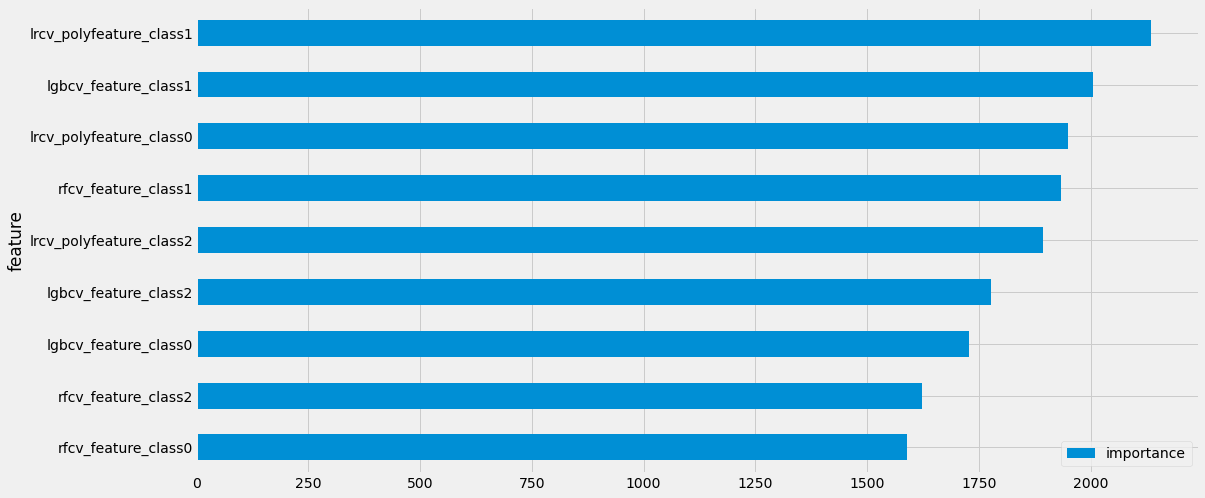

In [16]:
imp = pd.DataFrame({'feature': feature_names, 'importance': clf.feature_importances_})
imp = imp.sort_values('importance').set_index('feature')
imp.plot(kind='barh')

In [18]:
sub = pd.read_csv(sample_file, index_col=0)
print(sub.shape)
sub.head()

(80000, 1)


,class
id,
320000,2.0
320001,0.0
320002,2.0
320003,0.0
320004,2.0


In [19]:
sub[target_col] = np.argmax(p_tst, axis=1)
sub.head()

,class
id,
320000,2
320001,0
320002,2
320003,0
320004,2


In [20]:
sub[target_col].value_counts()

2    40994
0    29983
1     9023
Name: class, dtype: int64

In [22]:
sub.to_csv(sub_file)